#Mushrooms: Poisonous or Not?

##Loading and Preprocessing

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
import numpy as np
filename ='/content/drive/MyDrive/Coding Dojo/Portfolio/mushrooms.csv'

In [75]:
df = pd.read_csv(filename)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [76]:
ms = df.copy()
ms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


###1. Source of data

####https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download


###2. Brief description of data
####Per Kaggle: "This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy."

###3. What is the target?

####Poisonious or not?

###4. What does one row represent? (A person?  A business?  An event? A product?)

####A Mushroom.

###5. Is this a classification or regression problem?

####Classification

###6. How many features does the data have?

####21

###7. How many rows are in the dataset?

In [77]:
#8124 rows
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


###8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

####I believe this will be the largest datset i've worked with so far. That may become challenging based off of my current python knowledge.

In [78]:
#Deleted unnecessary columns.

ms = ms.drop(df.columns[[16]], axis=1)

In [79]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [80]:
#Checking for duplicate rows.
ms.duplicated().sum()

0

In [81]:
#Checking for missing values.
print(ms.isna().sum())
print(print(ms.isna().sum().sum(), 'missing values'))

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
0 missing values
None


In [82]:
#CHecked for inconsistencies in data for categorical values.

for c in ms.columns:
    print( "---- %s ---" % c)
    print( ms[c].value_counts())

---- class ---
e    4208
p    3916
Name: class, dtype: int64
---- cap-shape ---
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
---- cap-surface ---
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
---- cap-color ---
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
---- bruises ---
f    4748
t    3376
Name: bruises, dtype: int64
---- odor ---
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
---- gill-attachment ---
f    7914
a     210
Name: gill-attachment, dtype: int64
---- gill-spacing ---
c    6812
w    1312
Name: gill-spacing, dtype: int64
---- gill-size ---
b    5612
n    2512
Name: gill-size, dtype: int64
---- gill-color ---
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int6

AxesSubplot(0.125,0.125;0.775x0.755)


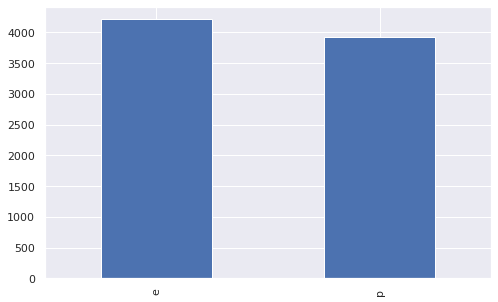

In [83]:
#Produced univariate visuals for the target and all features.
import seaborn as sns
import matplotlib.pyplot as plt

print(ms['class'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


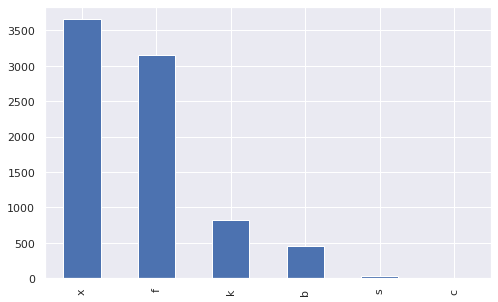

In [84]:
print(ms['cap-shape'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


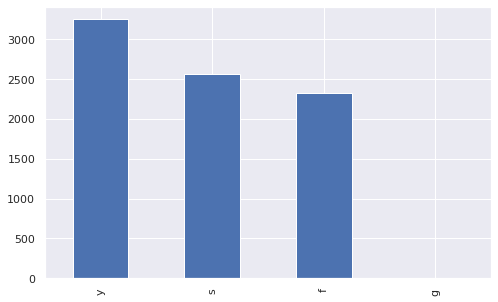

In [85]:
print(ms['cap-surface'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


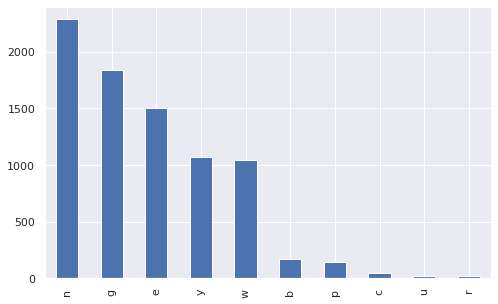

In [86]:
print(ms['cap-color'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


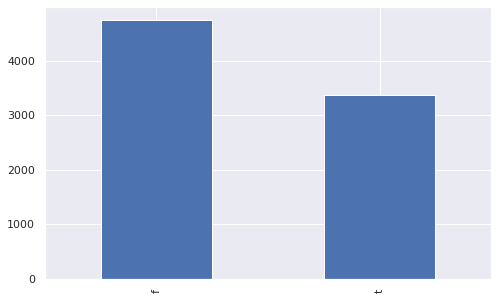

In [87]:
print(ms['bruises'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


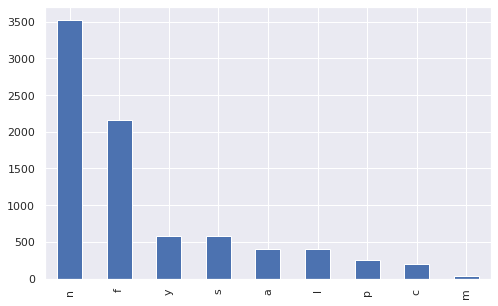

In [88]:
print(ms['odor'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


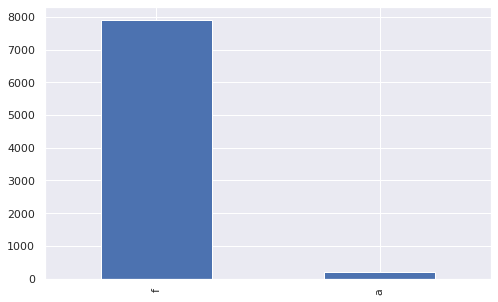

In [89]:
print(ms['gill-attachment'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


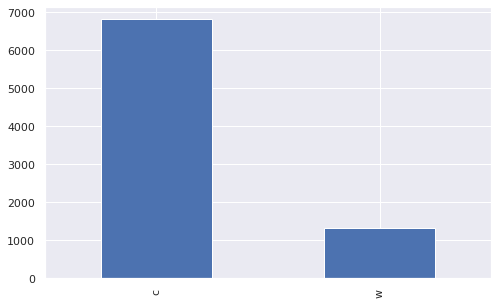

In [90]:
print(ms['gill-spacing'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


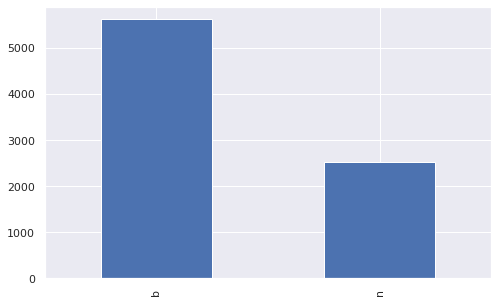

In [91]:
print(ms['gill-size'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


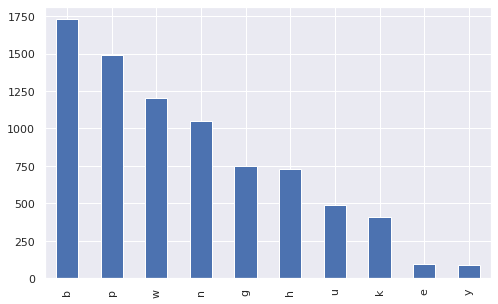

In [92]:
print(ms['gill-color'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


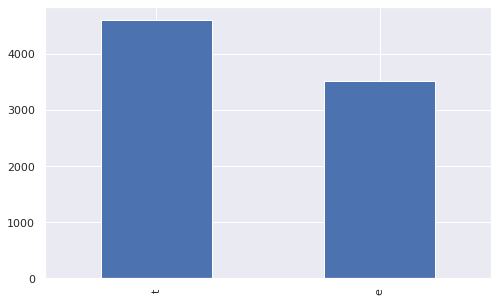

In [93]:
print(ms['stalk-shape'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


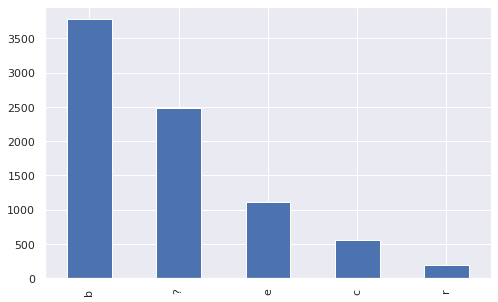

In [94]:
print(ms['stalk-root'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


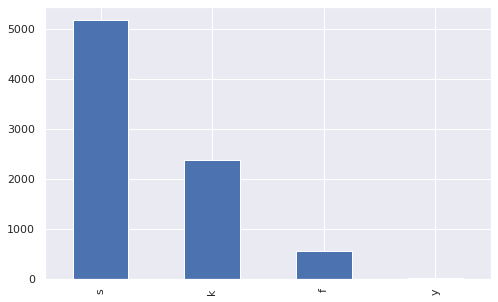

In [95]:
print(ms['stalk-surface-above-ring'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


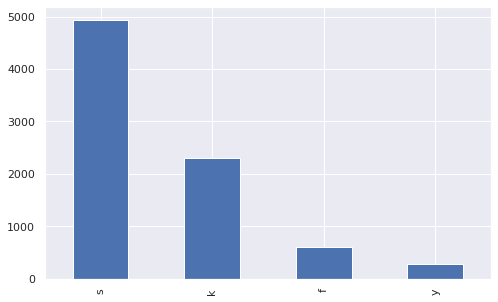

In [96]:
print(ms['stalk-surface-below-ring'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


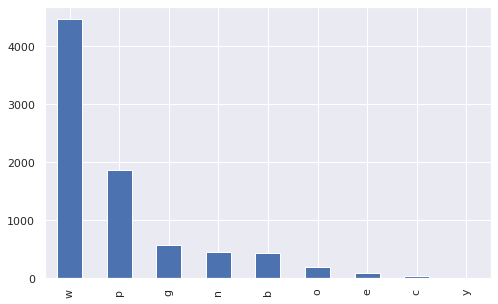

In [97]:
print(ms['stalk-color-above-ring'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


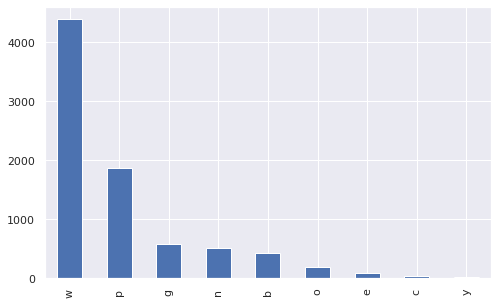

In [98]:
print(ms['stalk-color-below-ring'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


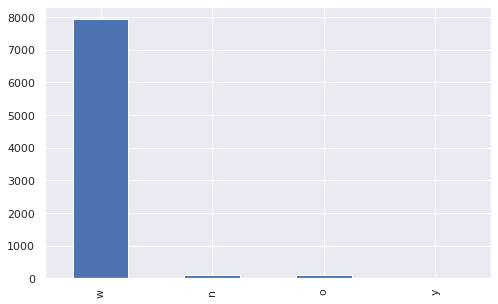

In [99]:
print(ms['veil-color'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


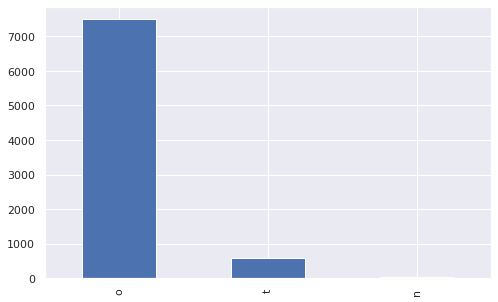

In [100]:
print(ms['ring-number'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


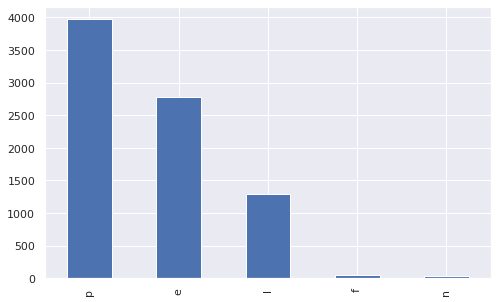

In [101]:
print(ms['ring-type'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


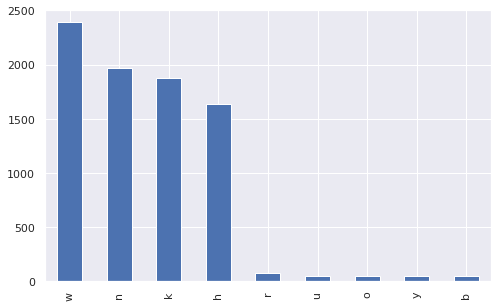

In [102]:
print(ms['spore-print-color'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


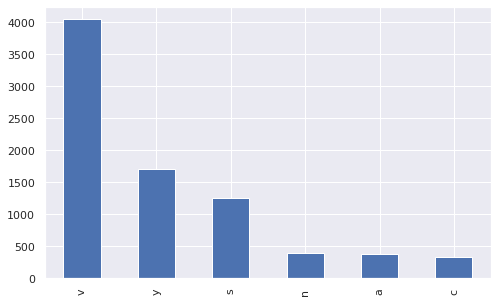

In [103]:
print(ms['population'].value_counts().head(10).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


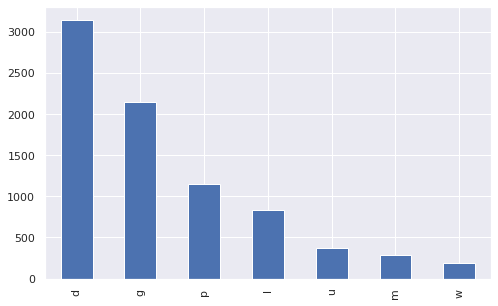

In [104]:
print(ms['habitat'].value_counts().head(10).plot.bar())

In [45]:
#Identify outliers.
ms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148
